In [1]:
import heapq
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0

    pq = [(0, starting_vertex)]
    
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

In [3]:
airport_graph_dict = {
    'Seattle': {'San Francisco':807,'Denver':1331,'Chicago':2097},
    'San Francisco': {'Seattle':807,'Denver':1267,'Los Angeles':381},
    'Los Angeles': {'San Francisco':381,'Denver':1015,'Kansas City':1663,'Dallas':1435},
    'Denver': {'Seattle':1331,'San Francisco':1267,'Los Angeles':1015,'Kansas City':599,'Chicago':1003},
    'Chicago': {'Seattle':2097,'Denver':1003,'Kansas City':533,'New York':787,'Boston':983},
    'Boston': {'Chicago':983,'New York':214},
    'New York': {'Boston':214,'Chicago':787,'Kansas City':1260,'Atlanta':888},
    'Kansas City': {'Chicago':533,'New York':1260,'Atlanta':864,'Dallas':496,'Los Angeles':1663,'Denver':599},
    'Atlanta': {'New York':888,'Miami':661,'Houston':810,'Dallas':781,'Kansas City':864},
    'Dallas': {'Atlanta':781,'Houston':239,'Los Angeles':1435,'Kansas City':496},
    'Houston': {'Dallas':239,'Atlanta':810,'Miami':1187},
    'Miami': {'Houston':1187,'Atlanta':661}
}

In [4]:
print(calculate_distances(airport_graph_dict, 'Seattle'))

{'Seattle': 0, 'San Francisco': 807, 'Los Angeles': 1188, 'Denver': 1331, 'Chicago': 2097, 'Boston': 3080, 'New York': 2884, 'Kansas City': 1930, 'Atlanta': 2794, 'Dallas': 2426, 'Houston': 2665, 'Miami': 3455}


In [6]:
graph_airports_table = open("graph_airports_table.csv","w")
graph_airports_table.write('source,target,type,weight\n')

for i in airport_graph_dict.keys():
    for j in airport_graph_dict[i].keys():
        source = i
        target = j
        weight = int(airport_graph_dict[i][j])
        graph_airports_table.write(f'{source},{target},Undirected,{weight}\n')
        
graph_airports_table.close()        

In [7]:
airports_pd = pd.read_csv("graph_airports_table.csv")
# print(airports_pd)

In [8]:
airport_g = nx.from_pandas_edgelist(airports_pd, source='source', target='target', edge_attr='weight')

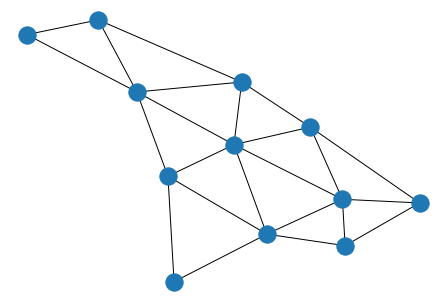

In [9]:
nx.draw(airport_g)